In [3]:
import pandas as pd
import re
from textblob import TextBlob
#TF-IDF Features-F1
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# load the dataset
df = pd.read_csv('../data/LGBT_Tweets_processed.csv')

In [4]:
# all lowercase
df.tweet = df.tweet.str.lower()

#Remove twitter handlers
df.tweet = df.tweet.apply(lambda x:re.sub('@[^\s]+','',x))

# remove url
df.tweet = df.tweet.apply(lambda x:re.sub(r"http\S+", "", x))

# Substituting multiple spaces to single space
df.tweet = df.tweet.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

#remove hashtags
df.tweet = df.tweet.apply(lambda x:re.sub(r'\B#\S+','',x))

#remove all single characters
df.tweet = df.tweet.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

In [5]:
#Perform sentiment analysis using TextBlob on data
df['sentiment'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'Neutral'))

In [6]:
df.head()

,Unnamed: 0,date,time,id,tweet,language,replies_count,retweets_count,likes_count,sentiment,sentiment_label
0,0,2022-08-26,10:31:10,1562991009180827649,praying for my lgbt nigerians 🙏🏽🙏🏽🙏🏽,en,0,0,0,0.000000,Neutral
1,1,2022-08-26,10:31:02,1562990976939229184,so pass agg omg you really are lgbt,en,0,0,0,0.200000,positive
2,3,2022-08-26,10:30:59,1562990965442326528,"many working in the media, twitter and fb see...",en,0,0,0,0.235119,positive
3,7,2022-08-26,10:30:34,1562990860928659457,to be clear it doesn't justify what the lgbt c...,en,0,0,0,0.050000,positive
4,10,2022-08-26,10:30:24,1562990819485032449,good night lgbt community,en,1,0,2,0.700000,positive


## Vectorizing with TF_IDF

In [7]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['tweet'])


# Running different model Using TFIDF

## Random Forest

In [8]:
X = tfidf
y = df['sentiment_label']
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)
acc=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc)

              precision    recall  f1-score   support

     Neutral       0.78      0.75      0.77      1875
    negative       0.95      0.30      0.46      1550
    positive       0.68      0.92      0.78      3067

    accuracy                           0.73      6492
   macro avg       0.80      0.66      0.67      6492
weighted avg       0.77      0.73      0.70      6492

Random Forest, Accuracy Score: 0.7256623536660505


## Logistic Regression

In [9]:
X = tfidf
y = df['sentiment_label']
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model = LogisticRegression(solver='lbfgs', max_iter=5000).fit(X_train_tfidf,y_train)
y_preds = model.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)
acc1=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc1)

              precision    recall  f1-score   support

     Neutral       0.82      0.86      0.84      1875
    negative       0.85      0.64      0.73      1550
    positive       0.83      0.90      0.86      3067

    accuracy                           0.83      6492
   macro avg       0.83      0.80      0.81      6492
weighted avg       0.83      0.83      0.82      6492

Logistic Regression, Accuracy Score: 0.8279420825631546


## Naive Bayes

In [10]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X.toarray(), y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train_tfidf,y_train)
y_preds = nb.predict(X_test_tfidf)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

     Neutral       0.67      0.81      0.73      1875
    negative       0.39      0.72      0.51      1550
    positive       0.83      0.37      0.51      3067

    accuracy                           0.58      6492
   macro avg       0.63      0.63      0.58      6492
weighted avg       0.68      0.58      0.58      6492

Naive Bayes, Accuracy Score: 0.5817929759704251


## Support Vector Machine

In [11]:
support =LinearSVC(random_state=20)
support.fit(X_train_tfidf,y_train)
y_preds = support.predict(X_test_tfidf)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds)
print(report)
print("SVM, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

     Neutral       0.84      0.89      0.87      1875
    negative       0.83      0.73      0.78      1550
    positive       0.88      0.90      0.89      3067

    accuracy                           0.86      6492
   macro avg       0.85      0.84      0.84      6492
weighted avg       0.86      0.86      0.85      6492

SVM, Accuracy Score: 0.8561306223043746


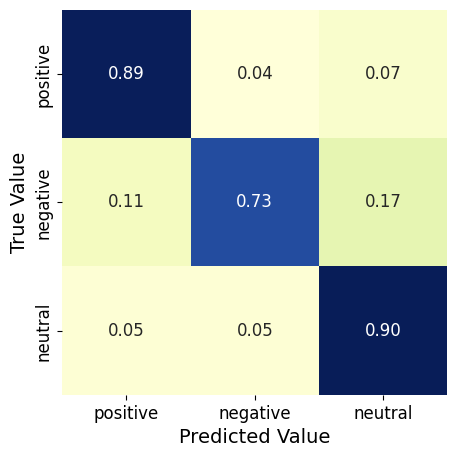

In [12]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['positive','negative','neutral']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

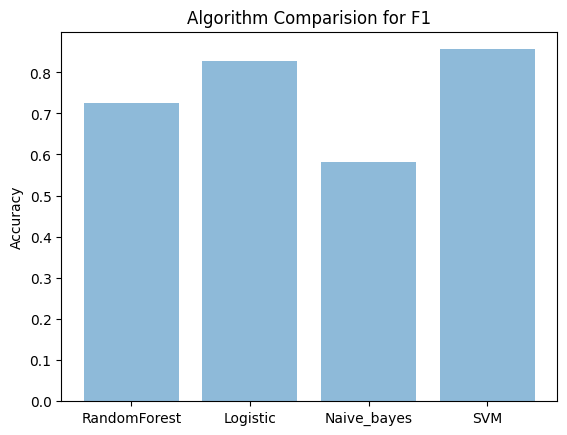

In [13]:
objects = ('RandomForest','Logistic', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2,acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for F1')
plt.show()

# <font color=blue>Summary</font>

- I use sentiment analysis labels as labels for machine learning models. I vectorize the tweets with TF_IDF vectorization. I then train the data with different machine learning models to choose the best result 
- SVM provides the best result out of 4 models
- if a simple model works, embrace it. pick a model that can build and iterate quickly.